In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/monthly-sunspots.csv")

In [ ]:
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


переведем названия в нижний регистр

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df['month'] = pd.to_datetime(df['month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     2820 non-null   datetime64[ns]
 1   sunspots  2820 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 44.2 KB


In [ ]:
df.head()

,month,sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


In [ ]:
df['sunspots'].describe()


,sunspots
count,2820.000000
mean,51.265957
std,43.448971
min,0.000000
25%,15.700000
50%,42.000000
75%,74.925000
max,253.800000


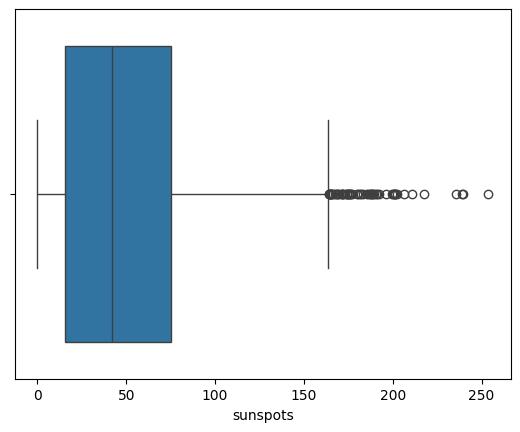

In [ ]:
sns.boxplot(data = df, x = 'sunspots');

визуально есть подозрения на выбросы, где значения больше 160

In [ ]:
df.set_index('month', inplace=True)
yearly = df.resample('YE').mean()

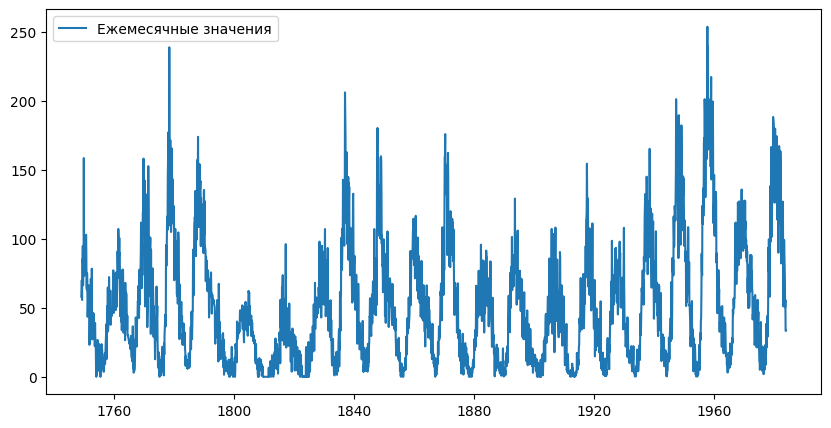

In [ ]:
# Построим графики
plt.figure(figsize=(10, 5))
plt.plot(df.index, df.sunspots, label='Ежемесячные значения')
plt.legend()
plt.show()

подозрения на сезонность или цикл, тренд непонятен

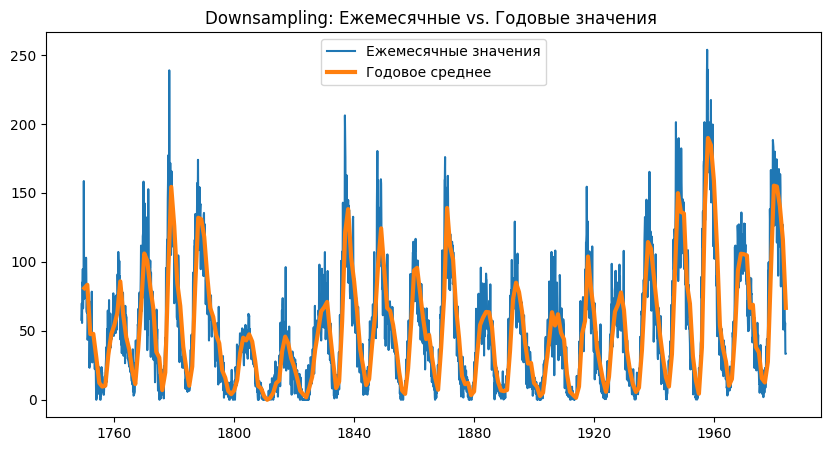

In [ ]:

# Построим графики
plt.figure(figsize=(10, 5))
plt.plot(df.index, df.sunspots, label='Ежемесячные значения')
plt.plot(yearly.index, yearly.sunspots, label='Годовое среднее', linewidth=3)
plt.legend()
plt.title('Downsampling: Ежемесячные vs. Годовые значения ')
plt.show()


цикличность вырисовывается более отчетливо

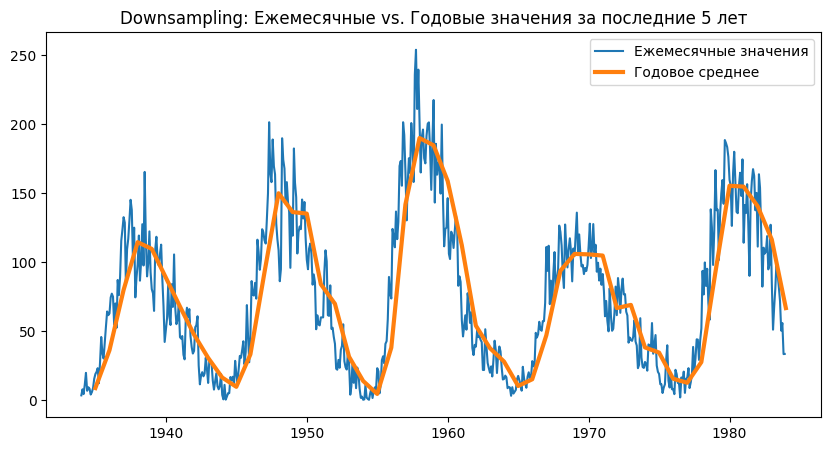

In [ ]:

# Построим графики
plt.figure(figsize=(10, 5))
plt.plot(df[-600:].index, df[-600:].sunspots, label='Ежемесячные значения')
plt.plot(yearly[-50:].index, yearly[-50:].sunspots, label='Годовое среднее', linewidth=3)
plt.legend()
plt.title('Downsampling: Ежемесячные vs. Годовые значения за последние 5 лет')
plt.show()

визуально есть подтверждение 11летнего цикла солнечной активности

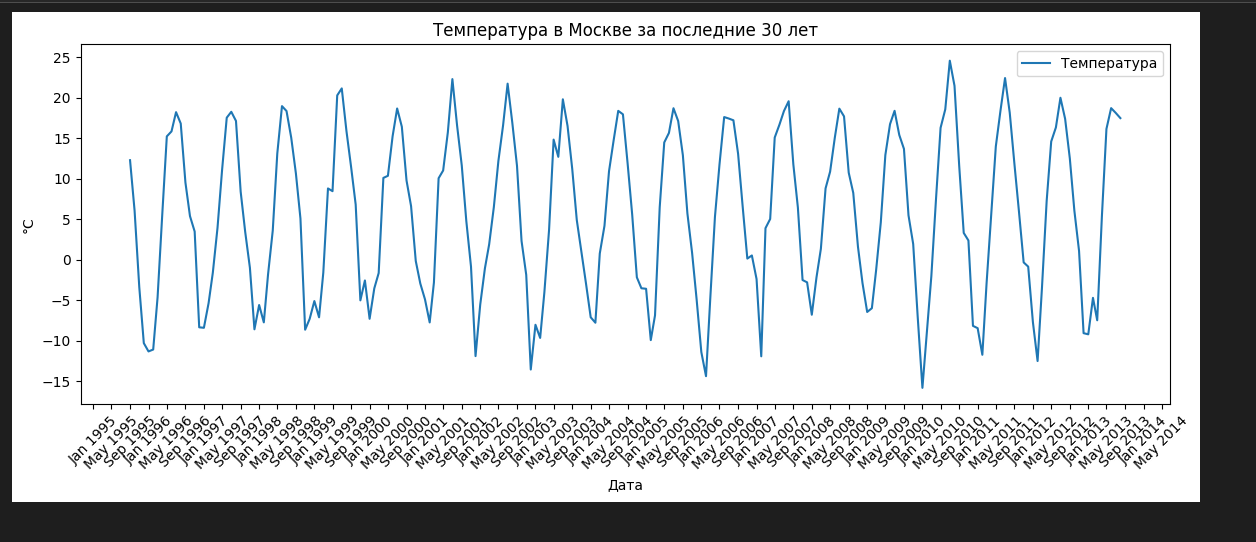

In [ ]:
# Upsampling: из недельных — в ежедневные значения
df_short= df[-12:]

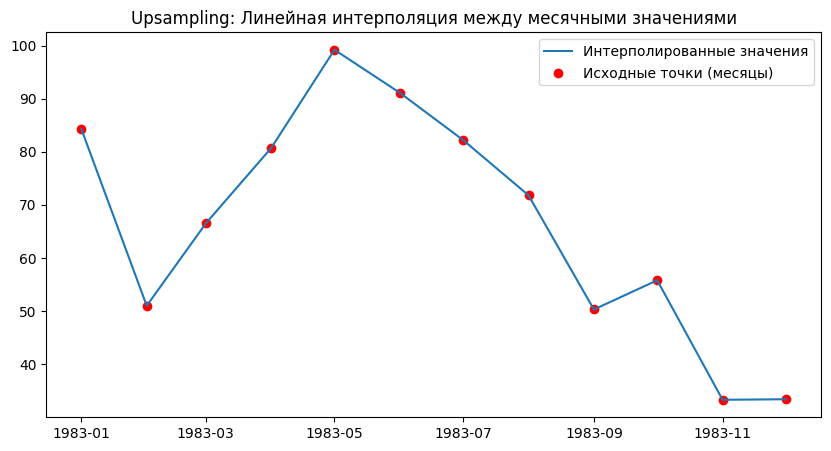

In [ ]:
# Upsampling: из месячных — в ежедневные значения

upsampled = df_short.resample('D').interpolate(method='linear')

plt.figure(figsize=(10, 5))
plt.plot(upsampled.index, upsampled['sunspots'], label='Интерполированные значения')
plt.scatter(df_short.index, df_short['sunspots'], label='Исходные точки (месяцы)', color='red')
plt.legend()
plt.title('Upsampling: Линейная интерполяция между месячными значениями')
plt.show()



построим лаг на 11 лет назад

In [ ]:
yearly

,sunspots
month,
1749-12-31,80.925000
1750-12-31,83.391667
1751-12-31,47.658333
1752-12-31,47.800000
1753-12-31,30.691667
...,...
1979-12-31,155.275000
1980-12-31,154.650000
1981-12-31,140.375000


In [ ]:
yearly['lag11'] = yearly.sunspots.shift(11)
yearly.head(15)

,sunspots,lag11
month,,
1749-12-31,80.925000,NaN
1750-12-31,83.391667,NaN
1751-12-31,47.658333,NaN
1752-12-31,47.800000,NaN
1753-12-31,30.691667,NaN
1754-12-31,12.216667,NaN
1755-12-31,9.566667,NaN
1756-12-31,10.191667,NaN
1757-12-31,32.425000,NaN


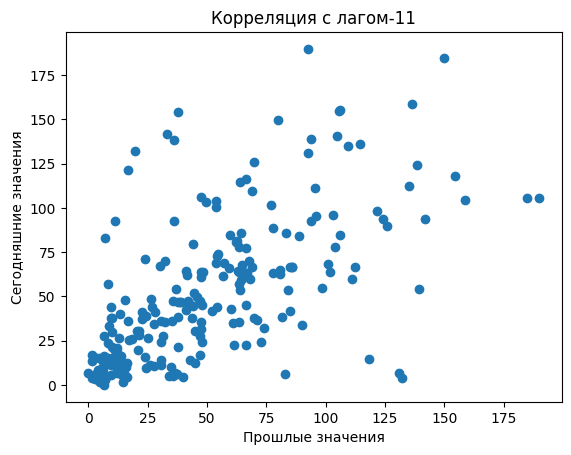

In [ ]:
plt.scatter(yearly['lag11'], yearly.sunspots)
plt.xlabel('Прошлые значения')
plt.ylabel('Сегодняшние значения')
plt.title('Корреляция с лагом-11')
plt.show()


подозрения на легкую корреляцию имеется

строим MA за 11 лет

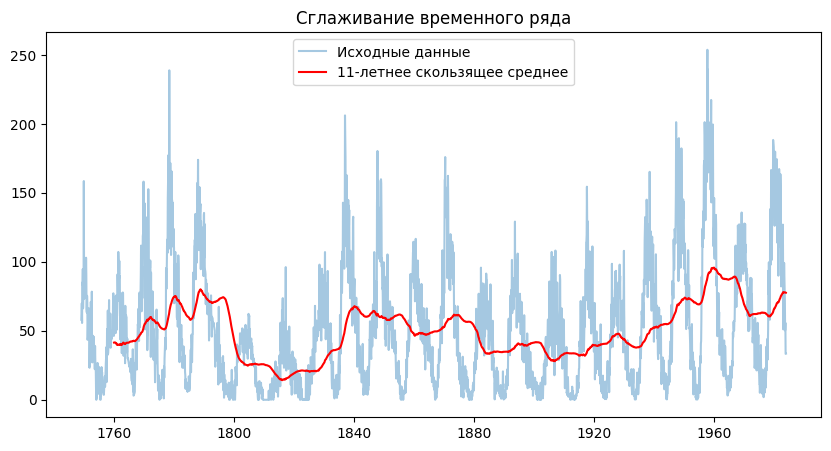

In [ ]:
# Скользящее среднее за 7 дней
df['rolling_11'] = df['sunspots'].rolling(window=11*12).mean()
plt.figure(figsize=(10,5))
plt.plot(df.index, df['sunspots'], alpha=0.4, label='Исходные данные')
plt.plot(df.index, df['rolling_11'], color='red', label='11-летнее скользящее среднее')
plt.legend()
plt.title('Сглаживание временного ряда')
plt.show()


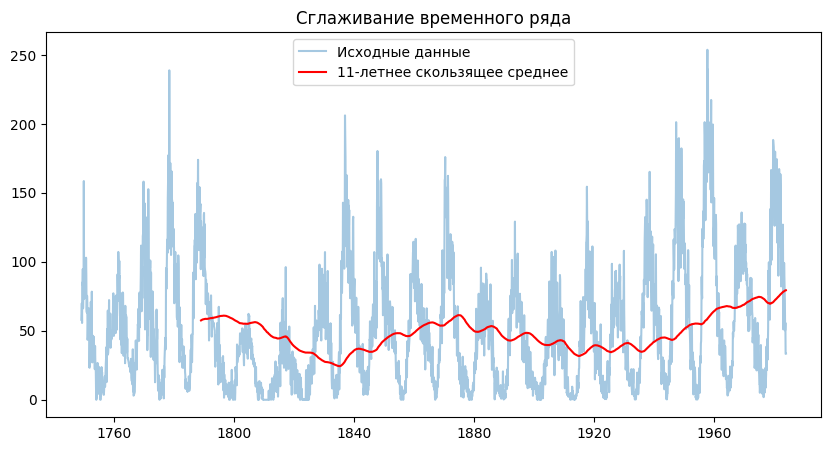

In [ ]:
df['rolling_11'] = df['sunspots'].rolling(window=40*12).mean()
plt.figure(figsize=(10,5))
plt.plot(df.index, df['sunspots'], alpha=0.4, label='Исходные данные')
plt.plot(df.index, df['rolling_11'], color='red', label='11-летнее скользящее среднее')
plt.legend()
plt.title('Сглаживание временного ряда')
plt.show()


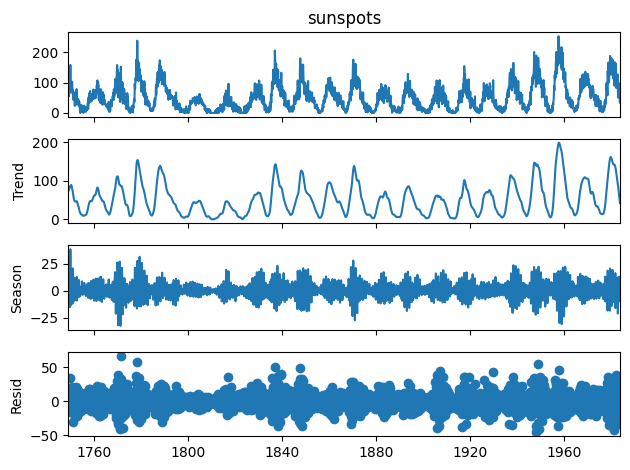

In [ ]:
stl = STL(df['sunspots'], period=12)  # предполагается годовая сезонность
res = stl.fit()

res.plot()
plt.show()


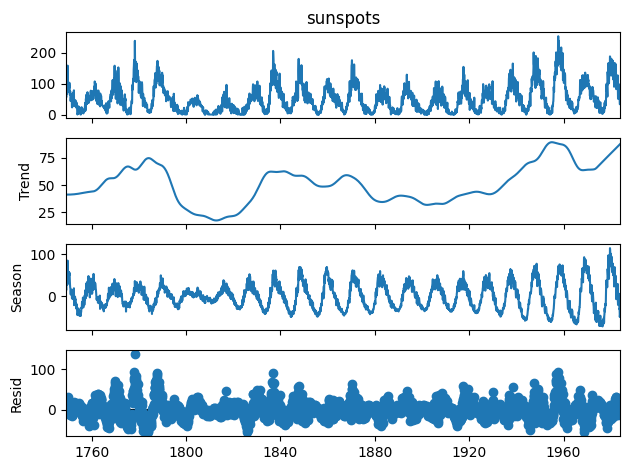

In [ ]:
stl = STL(df['sunspots'], period=12*11)  # предполагается 11 летние циклы
res = stl.fit()

res.plot()
plt.show()

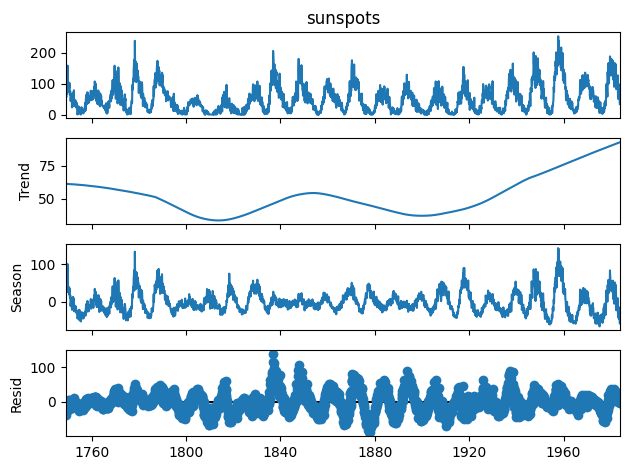

In [ ]:
stl = STL(df['sunspots'], period=12*40)  # предполагается 40 летние циклы
res = stl.fit()

res.plot()
plt.show()

In [ ]:
stl = STL(df['sunspots'], period=12*11)  # предполагается 11 летние циклы
res = stl.fit()

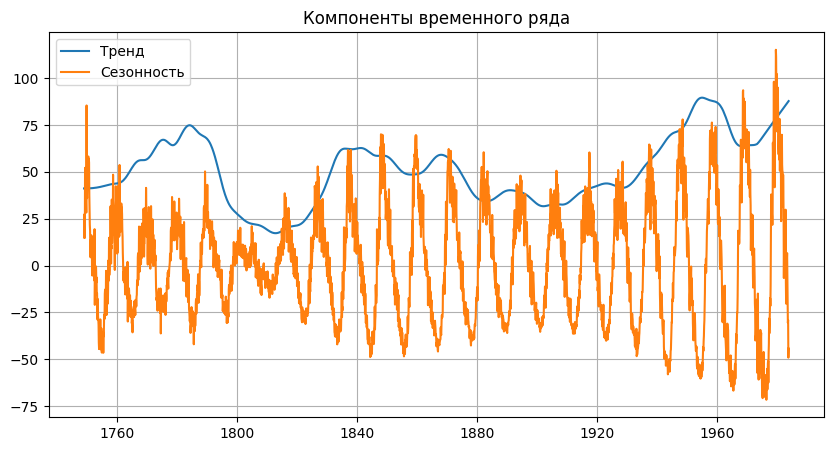

In [ ]:
df['trend'] = res.trend
df['seasonal'] = res.seasonal
df['resid'] = res.resid

plt.figure(figsize=(10, 5))
plt.plot(df['trend'], label='Тренд')
plt.plot(df['seasonal'], label='Сезонность')
plt.legend()
plt.title('Компоненты временного ряда')
plt.grid(True)
plt.show()
